In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [32]:
data = pd.read_csv("DRUGS SIDE EFFECTS.csv")
data.head(10)

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects
5,Aabida,F,valtrex,55.0,"Hispanic, White",No Side Effects
6,Aabidah,F,levoxyl,34.0,White,No Side Effects
7,Aabigail,F,imitrex,28.0,White,Moderate Side Effects
8,Aabir,M,seroquel,38.0,White,Mild Side Effects
9,Aabir,M,minocycline,56.0,White,No Side Effects


In [33]:
# check for rows with all the features having the same values
same_values_rows = data[data.duplicated(keep=False) & data.apply(lambda x: x.nunique() ==1, axis=1)]

# Print the rows with all the features having the same values
print("Rows with the same values in all features:")
print(same_values_rows)


Rows with the same values in all features:
Empty DataFrame
Columns: [NAME, GENDER, DRUG NAME, AGE, RACE, SIDE EFFECTS]
Index: []


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NAME          400000 non-null  object 
 1   GENDER        400000 non-null  object 
 2   DRUG NAME     400000 non-null  object 
 3   AGE           399980 non-null  float64
 4   RACE          400000 non-null  object 
 5   SIDE EFFECTS  400000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 18.3+ MB


In [35]:
data.shape

(400000, 6)

In [36]:
data.describe()

,AGE
count,399980.000000
mean,41.454180
std,12.341896
min,14.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,90.000000


In [37]:
data.isna().sum()

NAME             0
GENDER           0
DRUG NAME        0
AGE             20
RACE             0
SIDE EFFECTS     0
dtype: int64

In [38]:
data.nunique()

NAME            133911
GENDER               2
DRUG NAME          502
AGE                 67
RACE                 9
SIDE EFFECTS         5
dtype: int64

<Axes: ylabel='count'>

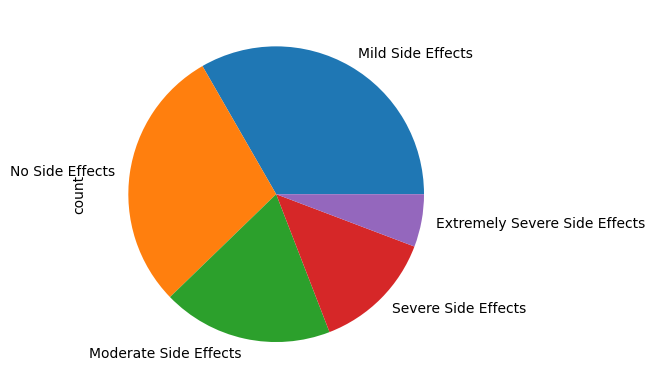

In [39]:
data['SIDE EFFECTS'].value_counts().plot(kind = 'pie')

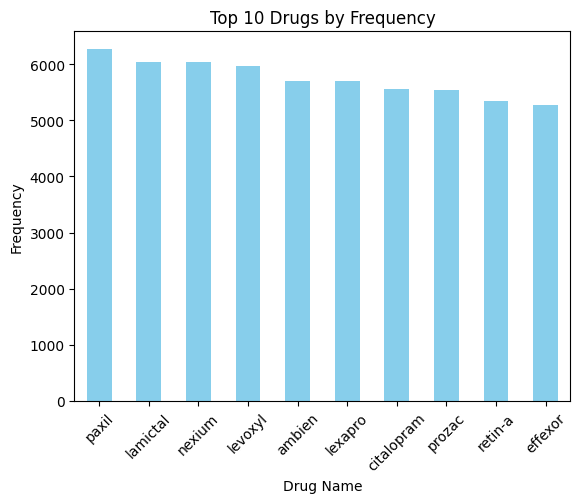

In [40]:
# Example: Count occurrences of each drug
drug_counts = data['DRUG NAME'].value_counts()

# Plotting the top 10 drugs (for clarity)
drug_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Drugs by Frequency')
plt.xlabel('Drug Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

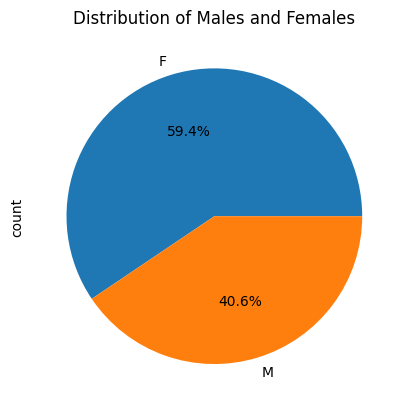

In [41]:
data["GENDER"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")
plt.title("Distribution of Males and Females")
plt.show()

<Figure size 1000x600 with 0 Axes>

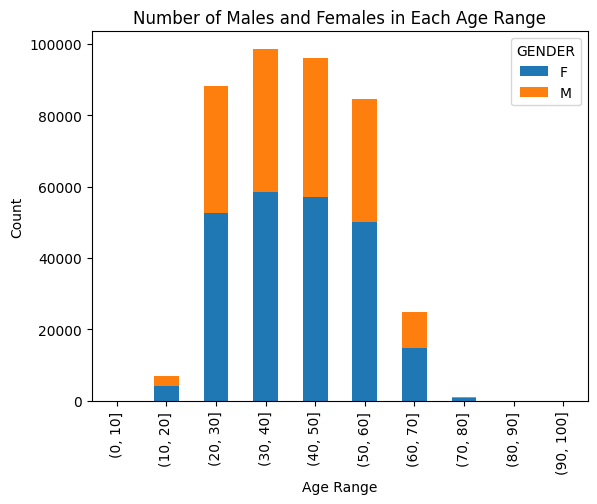

In [42]:
age_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# categorize the ages into the defined ranges
data["Age Range"] = pd.cut(data["AGE"], bins=age_ranges)

# Group the data by age range and gender, and count the number of occurances
grouped_data = data.groupby(["Age Range", "GENDER"]).size().unstack()

# Set the figure size
plt.figure(figsize=(10,6))

# Create a stacked bar plot
ax = grouped_data.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.title("Number of Males and Females in Each Age Range")

plt.show()

In [43]:
data["Age Range"]= pd.cut(data['AGE'], bins=age_ranges).astype(str)

# Group the data by age range and gender and count the number of occurences

grouped_data = data.groupby(["Age Range", "GENDER"]).size().unstack()

# Create a stacked bar plot using plotly
fig= go.Figure()

# Add bars for males and females in each age range
for col in grouped_data.columns:
    fig.add_trace(go.Bar(x =grouped_data.index, y=grouped_data[col], name=col,
                         text=grouped_data[col], textposition="auto"))
                         
# Update the layout of the figure

fig.update_layout(barmode="stack", xaxis_title = "Age Range", yaxis_title="count",
                  title = "Number of Males and Females in Each Age Range")

fig.show()

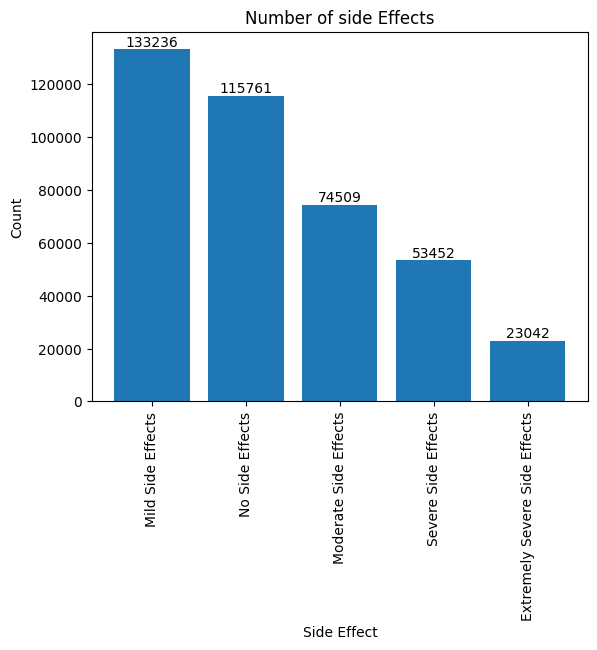

In [44]:
side_effect_counts = data["SIDE EFFECTS"].value_counts()
plt.bar(side_effect_counts.index, side_effect_counts.values)

plt.xlabel("Side Effect")
plt.ylabel("Count")
plt.title("Number of side Effects")

plt.xticks(rotation ="vertical")

for i, v in enumerate(side_effect_counts.values):
    plt.text(i, v, str(v), ha="center", va = "bottom")

plt.show()

In [45]:
race_counts = data["RACE"].value_counts()
fig = go.Figure(data=[go.Bar(x=race_counts.index, y=race_counts.values,
                             text=race_counts.values, textposition="auto")])

fig.update_layout(xaxis_title = "Race", yaxis_title="Count", title="Number of People by Race")

fig.update_layout(xaxis_tickangle=-45)

fig.show()

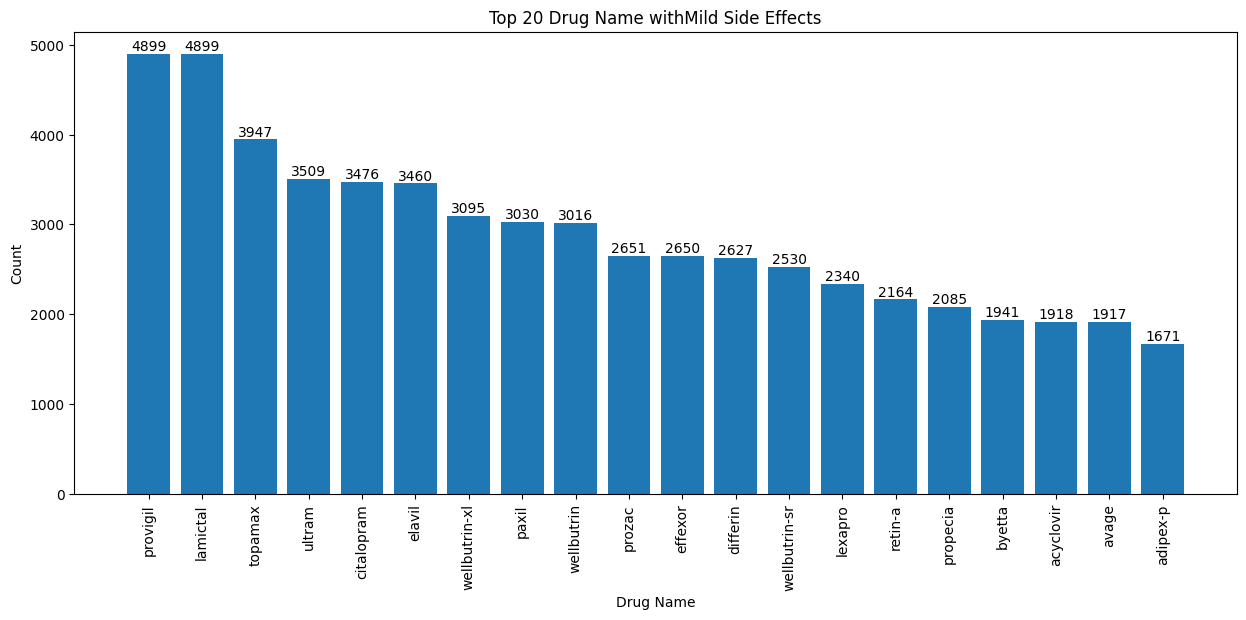

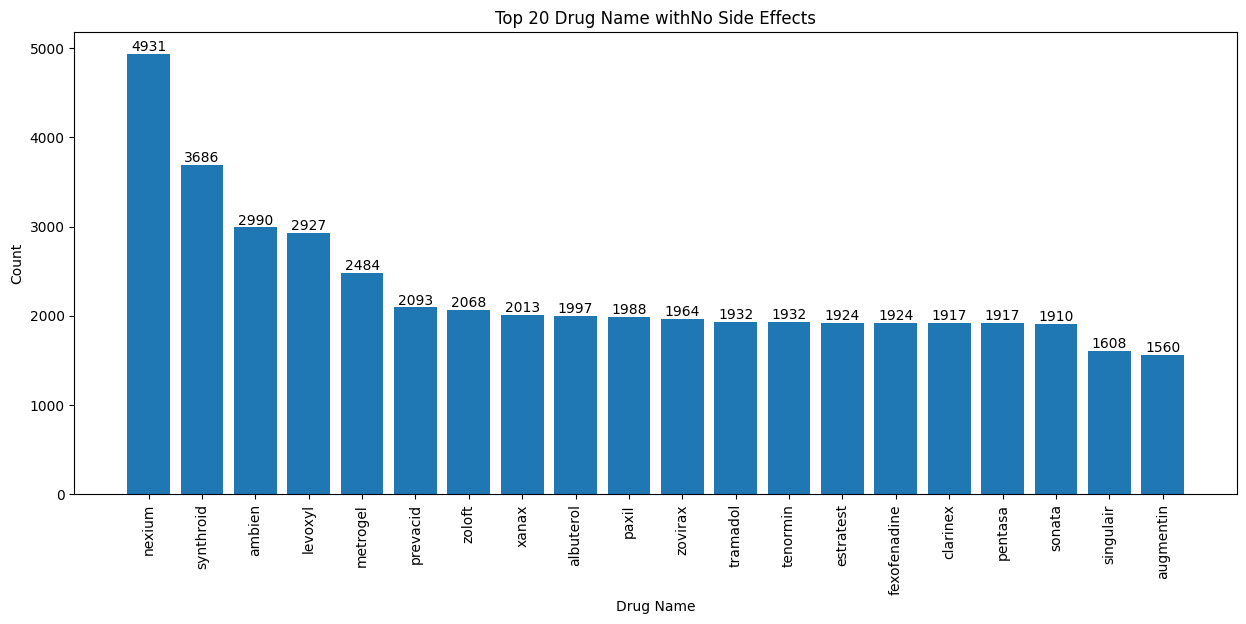

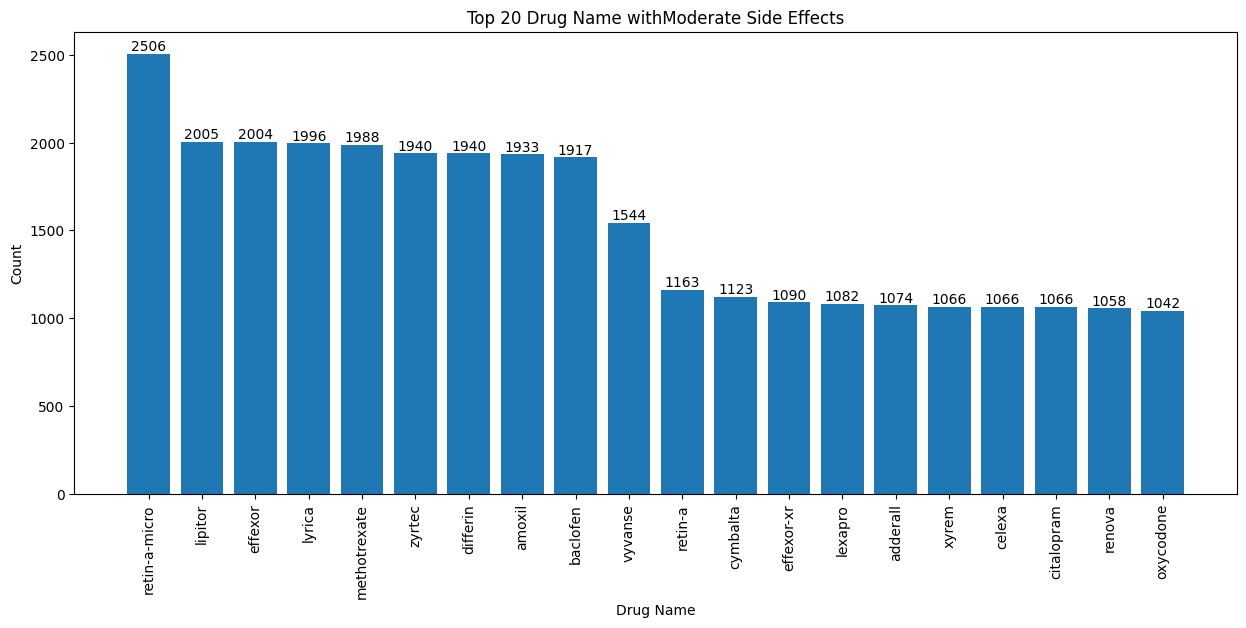

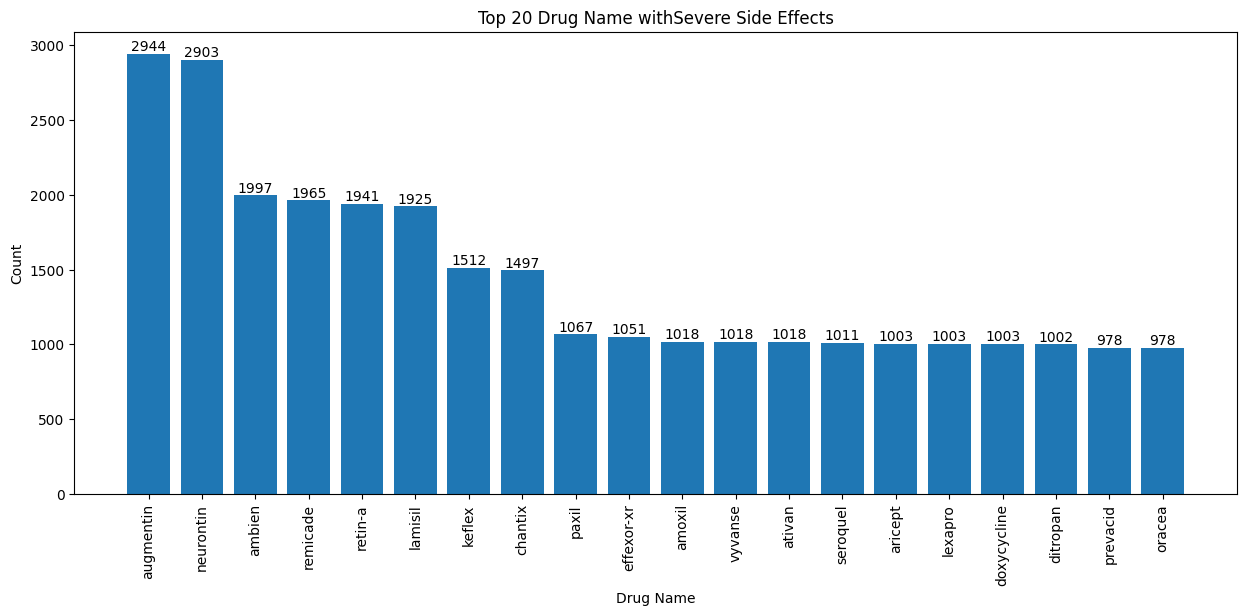

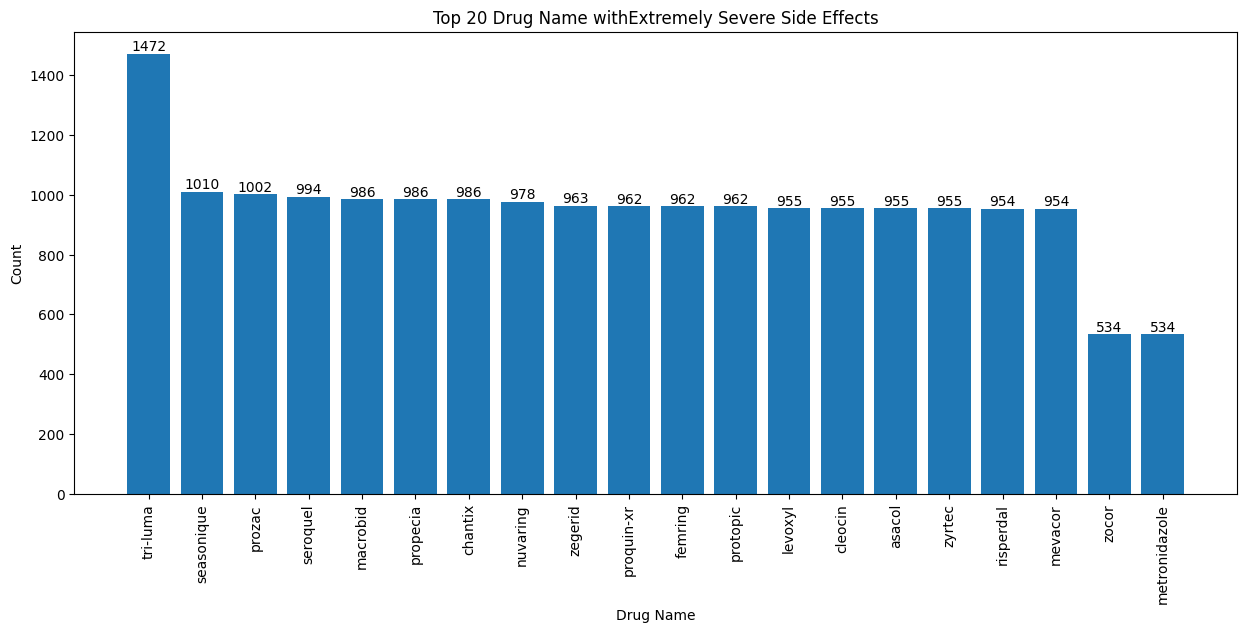

In [46]:
# Define the side effect categories

side_effect_categories = ["Mild Side Effects", "No Side Effects", "Moderate Side Effects", "Severe Side Effects", "Extremely Severe Side Effects"]

# Iterate over each side effect category

for category in side_effect_categories:
    # Filter the data for specific side effect category
    filtered_data = data[data['SIDE EFFECTS'] ==category]

    # count the occurences of each drug name
    drug_counts = filtered_data["DRUG NAME"].value_counts()

    # Sort the drug names based on the counts
    sorted_drug = drug_counts.sort_values(ascending=False)

    # Select the top 20 drug names
    top_20_drugs = sorted_drug.head(20)

    # Create a bar plot to display the top 20 drug name
    plt.figure(figsize=(15, 6))
    plt.bar(top_20_drugs.index, top_20_drugs.values)

    # Add labels and title
    plt.xlabel("Drug Name")
    plt.ylabel("Count")
    plt.title(f"Top 20 Drug Name with{category}")

    # Rotate x-axis labels if needed
    plt.xticks(rotation = "vertical")

    # Add count values on top of each other
    for i, value in enumerate(top_20_drugs.values):
        plt.text(i, value, str(value), ha="center", va="bottom")

    # Display the plot
    plt.show(

    )


Data Preprocessing

In [47]:
data = data.drop("Age Range", axis=1)

In [48]:
# Filter out ages outside the range of 100
filtered_data=data[data["AGE"]>100]
print(len(filtered_data))

0


In [57]:
# print the output
print(filtered_data.head(20))

Empty DataFrame
Columns: [NAME, GENDER, DRUG NAME, AGE, RACE, SIDE EFFECTS]
Index: []


In [56]:
def process_age(age):
    if age > 100:
        return int(age/10)
    return age

data["AGE"] = data["AGE"].apply(process_age)

data.head()

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects


In [58]:
# Filter the DataFrame to include only rows where AGE is greater than 90
filtered_data = data[data["AGE"] > 90]
# Print the number of rows in the filtered DataFrame
print(len(filtered_data))

0


In [59]:
# Calculate the mean age
mean_age=data["AGE"].mean()

# Replace null values with the mean age

data["AGE"].fillna(mean_age, inplace=True)

In [60]:
data.isnull().sum()

NAME            0
GENDER          0
DRUG NAME       0
AGE             0
RACE            0
SIDE EFFECTS    0
dtype: int64